# 1. Import Package

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import geopandas as gpd

# 2. Ambil data,

Dalam kasus ini, data yang dipakai adalah data rekap kasus Covid dari Jawa Barat

In [3]:
response = requests.get('https://covid19-public.digitalservice.id/api/v1//sebaran_app_v2/jabar')

In [ ]:
datanya = response.json()
datanya

# 3. Convert data

Convert data yang tadinya dari web berbentuk JSON menjadi bentuk CSV

In [5]:
df = pd.json_normalize(datanya['data']['content'])

In [5]:
#df = pd.DataFrame(datanya['data']['content'])

In [6]:
df.to_csv('Data 2021-04-18 01-16-19 app_v2.csv')

# 4. Import Data

In [2]:
df = pd.read_csv('Data 2021-03-22 01-16-19.csv')

C:\Anaconda\envs\geopandas_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470292 entries, 0 to 470291
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               470292 non-null  int64  
 1   id                       470292 non-null  object 
 2   kode_kab                 470292 non-null  int64  
 3   nama_kab                 470292 non-null  object 
 4   kode_kec                 424394 non-null  float64
 5   nama_kec                 427752 non-null  object 
 6   kode_kel                 469299 non-null  float64
 7   nama_kel                 427629 non-null  object 
 8   status                   470292 non-null  object 
 9   stage                    470292 non-null  object 
 10  umur                     470292 non-null  object 
 11  gender                   463036 non-null  object 
 12  longitude                468010 non-null  float64
 13  latitude                 468010 non-null  float64
 14  tang

In [4]:
df.head()

,Unnamed: 0,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update
0,0,covid-1022200019927,3276,Kota Depok,3276010.0,Sawangan,NaN,Sawangan Lama,CLOSECONTACT,Discarded,20,Perempuan,106.764,-6.405,2021-03-21,2021-03-21,2021-03-21
1,1,covid-1022200019926,3276,Kota Depok,3276010.0,Sawangan,NaN,Sawangan Lama,CLOSECONTACT,Discarded,24,Perempuan,106.764,-6.405,2021-03-21,2021-03-21,2021-03-21
2,2,covid-1022200019922,3276,Kota Depok,3276031.0,Cilodong,3.276031e+09,Cilodong,CLOSECONTACT,Discarded,39,Perempuan,106.844,-6.430,2021-03-21,2021-03-21,2021-03-21
3,3,covid-1022200019925,3276,Kota Depok,3276041.0,Tapos,3.276041e+09,Cilangkap,CLOSECONTACT,Discarded,58,Perempuan,106.867,-6.433,2021-03-21,2021-03-21,2021-03-21
4,4,covid-1022200019923,3276,Kota Depok,3276031.0,Cilodong,3.276031e+09,Sukamaju,CLOSECONTACT,Discarded,64,Perempuan,106.854,-6.414,2021-03-21,2021-03-21,2021-03-21


In [5]:
df= df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,id,kode_kab,nama_kab,kode_kec,nama_kec,kode_kel,nama_kel,status,stage,umur,gender,longitude,latitude,tanggal_update_nasional,tanggal_konfirmasi,tanggal_update
0,covid-1022200019927,3276,Kota Depok,3276010.0,Sawangan,NaN,Sawangan Lama,CLOSECONTACT,Discarded,20,Perempuan,106.764,-6.405,2021-03-21,2021-03-21,2021-03-21
1,covid-1022200019926,3276,Kota Depok,3276010.0,Sawangan,NaN,Sawangan Lama,CLOSECONTACT,Discarded,24,Perempuan,106.764,-6.405,2021-03-21,2021-03-21,2021-03-21
2,covid-1022200019922,3276,Kota Depok,3276031.0,Cilodong,3.276031e+09,Cilodong,CLOSECONTACT,Discarded,39,Perempuan,106.844,-6.430,2021-03-21,2021-03-21,2021-03-21
3,covid-1022200019925,3276,Kota Depok,3276041.0,Tapos,3.276041e+09,Cilangkap,CLOSECONTACT,Discarded,58,Perempuan,106.867,-6.433,2021-03-21,2021-03-21,2021-03-21
4,covid-1022200019923,3276,Kota Depok,3276031.0,Cilodong,3.276031e+09,Sukamaju,CLOSECONTACT,Discarded,64,Perempuan,106.854,-6.414,2021-03-21,2021-03-21,2021-03-21


# 5. Normalisasi Nama Kabupaten/ Kota

Hal ini harus dilakukan karena pada field data tersebut terdapat beberapa cara penulisan nama kabupaten/ kota yang sama, sehingga harus dilakukan normalisasi disesuaikan dengan nama Kabupaten/Kota dari Data GIS yang didapatkan (dalam kasus ini didapat dari situs Pikobar)

In [7]:
label = {
    "KAB. KUNINGAN" :  'KAB. KUNINGAN',
    "KAB. BANDUNG" :  'KAB. BANDUNG',
    "KAB. BEKASI" :  'KAB. BEKASI',
    "KAB. BANDUNG BARAT" :  'KAB. BANDUNG BARAT',
    "KOTA BANJAR" :  'KOTA BANJAR',
    "KAB. CIREBON" :  'KAB. CIREBON',
    "KAB. PANGANDARAN" :  'KAB. PANGANDARAN',
    "KAB. SUBANG" :  'KAB. SUBANG',
    "Kabupaten Cirebon" : 'KAB. CIREBON',
    "Kabupaten Ciamis" : 'KAB. CIAMIS',
    "Kota Banjar" :  'KOTA BANJAR',
    "Kabupaten Bogor" : 'KAB. BOGOR',
    "Kabupaten Purwakarta" : 'KAB. PURWAKARTA',
    "Kabupaten Garut" : 'KAB. GARUT',
    "Kabupaten Kuningan" : 'KAB. KUNINGAN',
    "Luar Jawa Barat" : 'LUAR JAWA BARAT',
    "Kabupaten Indramayu" : 'KAB. INDRAMAYU',
    "KAB. TASIKMALAYA" :  'KAB. TASIKMALAYA',
    "KAB. SUKABUMI" :  'KAB. SUKABUMI',
    "KOTA BEKASI" :  'KOTA BEKASI',
    "KOTA SUKABUMI" :  'KOTA SUKABUMI',
    "KAB. KARAWANG" :  'KAB. KARAWANG',
    "CITEUREUP KOTA CIMAHI" : 'KOTA CIMAHI',
    "KAB. SUMEDANG" :  'KAB. SUMEDANG',
    "KOTA CIREBON" :  'KOTA CIREBON',
    "Kabupaten Pangandaran" : 'KAB. PANGANDARAN',
    "Kabupaten Subang" : 'KAB. SUBANG',
    "Kota Tasikmalaya" : 'KOTA TASIKMALAYA',
    "Kabupaten Bekasi" : 'KAB. BEKASI',
    "Kota Bekasi" : 'KOTA BEKASI',
    "Kabupaten Karawang" : 'KAB. KARAWANG',
    "Kabupaten Sukabumi" : 'KAB. SUKABUMI',
    "Kota Sukabumi" : 'KOTA SUKABUMI',
    "Kota Cirebon" : 'KOTA CIREBON',
    "KOTA BANDUNG" : 'KOTA BANDUNG',
    "KAB. GARUT" : 'KAB. GARUT',
    "KAB. CIANJUR" :  'KAB. CIANJUR',
    "KAB. CIAMIS" :  'KAB. CIAMIS',
    "KOTA TASIKMALAYA" :  'KOTA TASIKMALAYA',
    'Kota Depok' : 'KOTA DEPOK',
    'KAB. MAJALENGKA' : 'KAB. MAJALENGKA',
    'KAB. BOGOR' : 'KAB. BOGOR',
    'KOTA CIMAHI' : 'KOTA CIMAHI',
    'KAB. INDRAMAYU' : 'KAB. INDRAMAYU',
    'KAB. PURWAKARTA' : 'KAB. PURWAKARTA',
    'KOTA BOGOR' : 'KOTA BOGOR',
    'KOTA DEPOK' : 'KOTA DEPOK',
    'Kota Bogor' : 'KOTA BOGOR',
    'Kabupaten Bandung' : 'KAB. BANDUNG',
    'Kabupaten Tasikmalaya' : 'KAB. TASIKMALAYA',
    'Kabupaten Sumedang' : 'KAB. SUMEDANG',
    'Kabupaten Bandung Barat' : 'KAB. BANDUNG BARAT',
    'Kota Cimahi' : 'KOTA CIMAHI',
    'Kota Bandung' : 'KOTA BANDUNG',
    'Kabupaten Majalengka' : 'KAB. MAJALENGKA',
    'Jawa Barat' : 'JAWA BARAT',
    'Kabupaten Cianjur' : 'KAB. CIANJUR',
    'kabupaten Ciamis' : 'KAB. CIANJUR',
    'kabupaten Indramayu' : 'KAB. INDRAMAYU',
    'kabupaten Subang' : 'KAB. SUBANG',
    'kabupaten Tasikmalaya' : 'KAB. TASIKMALAYA',
    'kabupaten Cirebon' : 'KAB. CIREBON'
}

In [8]:
df['label_kota']= df.nama_kab.map(label)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470292 entries, 0 to 470291
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       470292 non-null  object 
 1   kode_kab                 470292 non-null  int64  
 2   nama_kab                 470292 non-null  object 
 3   kode_kec                 424394 non-null  float64
 4   nama_kec                 427752 non-null  object 
 5   kode_kel                 469299 non-null  float64
 6   nama_kel                 427629 non-null  object 
 7   status                   470292 non-null  object 
 8   stage                    470292 non-null  object 
 9   umur                     470292 non-null  object 
 10  gender                   463036 non-null  object 
 11  longitude                468010 non-null  float64
 12  latitude                 468010 non-null  float64
 13  tanggal_update_nasional  470292 non-null  object 
 14  tang

# 6. Filter Data berdasarkan Status Confirmation

Data yang Kita gunakan adalah Data dengan Status 'Confirmation'

## status confirmation vs stage (Selesai, Diisolasi, dan Meninggal)

In [10]:
df_konfirmasi = df[df['status'] == 'CONFIRMATION']
df_suspek = df[df['status'] == 'SUSPECT']

In [11]:
df_konfirmasi.count()

id                         239951
kode_kab                   239951
nama_kab                   239951
kode_kec                   194079
nama_kec                   197411
kode_kel                   239951
nama_kel                   197288
status                     239951
stage                      239951
umur                       239951
gender                     232770
longitude                  237669
latitude                   237669
tanggal_update_nasional    239951
tanggal_konfirmasi         239951
tanggal_update             239951
label_kota                 239951
dtype: int64

## EDA

In [12]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df_konfirmasi_stage= df_konfirmasi.groupby(['stage'])['id'].count().reset_index()
df_konfirmasi_stage= df_konfirmasi_stage.rename(columns={'id': 'Jumlah'}).sort_values('Jumlah', ascending= False)
df_konfirmasi_stage

,stage,Jumlah
2,Selesai,203556
0,Diisolasi,34207
1,Meninggal,2188


(0.0, 249951.0)

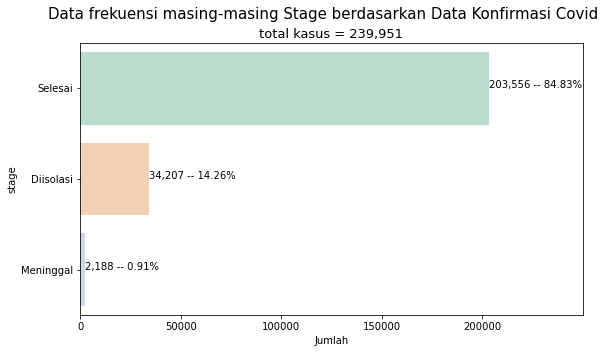

In [14]:
fig, ax1= plt.subplots(1, 1,figsize=(9,5))
plt.suptitle('Data frekuensi masing-masing Stage berdasarkan Data Konfirmasi Covid', fontsize=15, ha= 'center',)
ax1= sns.barplot(ax=ax1, y= df_konfirmasi_stage['stage'], x= df_konfirmasi_stage['Jumlah'], palette='Pastel2')
ax1.set_title('total kasus = {:,.0f}'.format(sum(df_konfirmasi_stage['Jumlah'])), pad= 5, fontsize= 13)
y = df_konfirmasi_stage['Jumlah']
for i, v in enumerate(y):
    ax1.text(v, i, '{:,.0f} -- {:,.2f}%'.format(v, 100*v/sum(df_konfirmasi_stage['Jumlah'])))
plt.xlim(0, sum(df_konfirmasi_stage['Jumlah'])+10000)

In [80]:
#fig.savefig('Data frekuensi masing-masing Stage berdasarkan Data Konfirmasi Covid - 21 Maret 2021.jpg', dpi= 300)

## status Suspect vs stage (Selesai, Diisolasi, dan Meninggal)

In [15]:
df_suspek_stage= df_suspek.groupby(['stage'])['id'].count().reset_index()
df_suspek_stage= df_suspek_stage.rename(columns={'id': 'Jumlah'}).sort_values('Jumlah', ascending= False)
df_suspek_stage

,stage,Jumlah
2,Discarded,93402
0,Diisolasi,8626
3,Meninggal,499
1,Dikarantina,51
4,Selesai,16


(0.0, 114594.0)

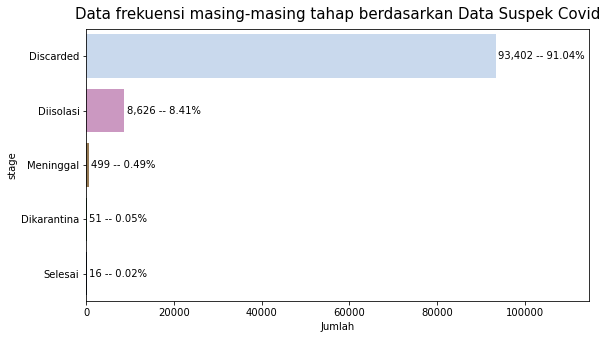

In [16]:
fig, ax1= plt.subplots(1, 1,figsize=(9,5))
ax1= sns.barplot(y= df_suspek_stage['stage'], x= df_suspek_stage['Jumlah'], palette='cubehelix_r')
y = df_suspek_stage['Jumlah']
for i, v in enumerate(y):
    ax1.text(v+600, i, '{:,.0f} -- {:,.2f}%'.format(v, 100*v/sum(df_suspek_stage['Jumlah'])), fontsize=10, va='center')
plt.title('Data frekuensi masing-masing tahap berdasarkan Data Suspek Covid', fontsize=15, pad= 10)
plt.xlim(0, sum(df_suspek_stage['Jumlah'])+12000)

In [153]:
#fig.savefig('Data frekuensi masing-masing Stage berdasarkan Data Suspek Covid.jpg - 21 Maret 2021.jpg', dpi= 300)

## status aktif (Dikarantina dan Diisolasi) per Kota / Kabupaten

In [17]:
df_aktif= df[df['stage'].isin(['Dikarantina', 'Diisolasi'])]

In [18]:
df_aktif_karantina= df_aktif[df_aktif['stage']== 'Dikarantina']
df_aktif_karantina_rekap= df_aktif_karantina.groupby(['label_kota'])['id'].count().reset_index().rename(columns={'id': 'jumlah karantina'})
df_aktif_isolasi= df_aktif[df_aktif['stage']== 'Diisolasi']
df_aktif_isolasi_rekap= df_aktif_isolasi.groupby(['label_kota'])['id'].count().reset_index().rename(columns={'id': 'jumlah isolasi'})

In [19]:
df_aktif_status= df_aktif_karantina_rekap.merge(df_aktif_isolasi_rekap, on= 'label_kota')

In [20]:
df_aktif_status['Jumlah aktif']= df_aktif_status.apply(lambda x: x['jumlah karantina']+x['jumlah isolasi'], axis=1)
df_aktif_status= df_aktif_status.sort_values('Jumlah aktif', ascending= False)
df_aktif_status

,label_kota,jumlah karantina,jumlah isolasi,Jumlah aktif
2,KAB. BEKASI,608,6363,6971
24,KOTA DEPOK,4,6311,6315
18,KOTA BANDUNG,730,3971,4701
9,KAB. KARAWANG,1079,3363,4442
25,KOTA SUKABUMI,3026,1112,4138
20,KOTA BEKASI,148,3496,3644
7,KAB. GARUT,1089,1753,2842
8,KAB. INDRAMAYU,105,2487,2592
3,KAB. BOGOR,309,2144,2453
0,KAB. BANDUNG,1178,1242,2420


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'KAB. BEKASI'),
  Text(1, 0, 'KOTA DEPOK'),
  Text(2, 0, 'KOTA BANDUNG'),
  Text(3, 0, 'KAB. KARAWANG'),
  Text(4, 0, 'KOTA SUKABUMI'),
  Text(5, 0, 'KOTA BEKASI'),
  Text(6, 0, 'KAB. GARUT'),
  Text(7, 0, 'KAB. INDRAMAYU'),
  Text(8, 0, 'KAB. BOGOR'),
  Text(9, 0, 'KAB. BANDUNG'),
  Text(10, 0, 'KOTA BOGOR'),
  Text(11, 0, 'KAB. SUKABUMI'),
  Text(12, 0, 'KAB. CIREBON'),
  Text(13, 0, 'KAB. CIANJUR'),
  Text(14, 0, 'KAB. SUBANG'),
  Text(15, 0, 'KAB. KUNINGAN'),
  Text(16, 0, 'KAB. PURWAKARTA'),
  Text(17, 0, 'KAB. BANDUNG BARAT'),
  Text(18, 0, 'KOTA TASIKMALAYA'),
  Text(19, 0, 'KAB. PANGANDARAN'),
  Text(20, 0, 'KOTA CIREBON'),
  Text(21, 0, 'KAB. MAJALENGKA'),
  Text(22, 0, 'KAB. SUMEDANG'),
  Text(23, 0, 'KAB. CIAMIS'),
  Text(24, 0, 'KOTA BANJAR'),
  Text(25, 0, 'KOTA CIMAHI'),
  Text(26, 0, 'KAB. TASIKMALAYA')])

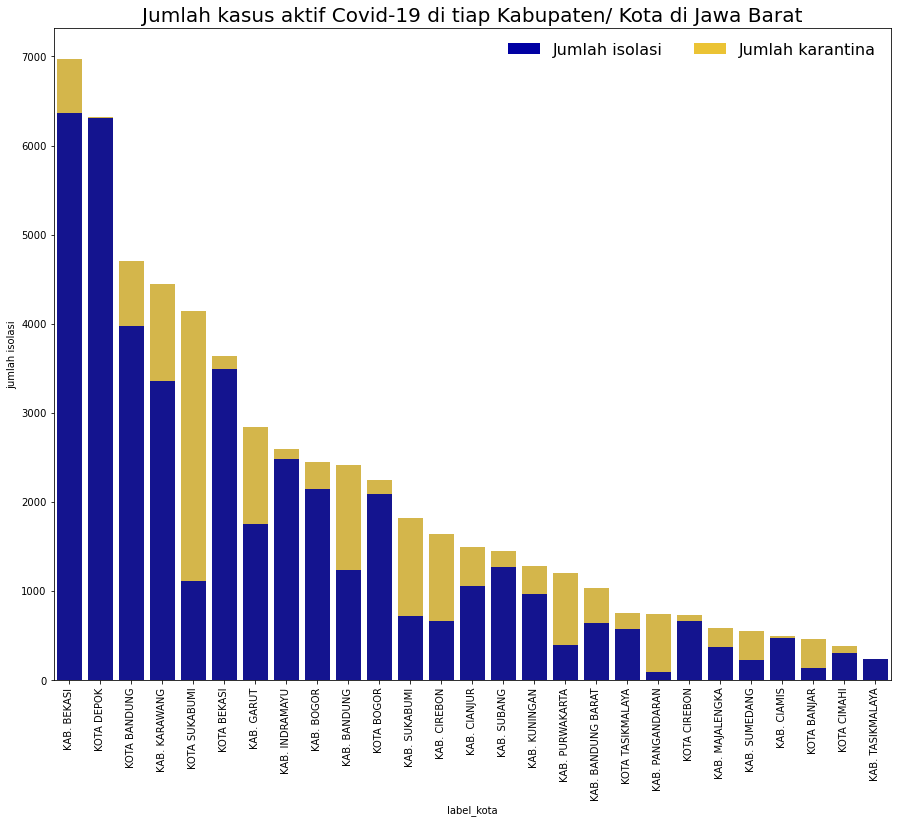

In [23]:
fig, ax1= plt.subplots(1,1, figsize=(15, 12))
plt.title('Jumlah kasus aktif Covid-19 di tiap Kabupaten/ Kota di Jawa Barat', fontsize= 20)
sns.barplot(x= df_aktif_status['label_kota'], y= df_aktif_status['Jumlah aktif'], color='#ebc334')
sns.barplot(x= df_aktif_status['label_kota'], y= df_aktif_status['jumlah isolasi'], color='#0000A3')
topbar = plt.Rectangle((0,0),1,1,fc="#ebc334", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Jumlah isolasi', 'Jumlah karantina'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

plt.xticks(rotation=90)

## Jumlah konfirmasi Covid per Kota/Kabupaten

In [24]:
df_konfirmasi_kabkota= df_konfirmasi.groupby(['label_kota'])['id'].count().reset_index().rename(columns={'label_kota': 'Kota/Kab', 'id': 'Jumlah'}).sort_values('Jumlah', ascending= False)
df_konfirmasi_kabkota.head()

,Kota/Kab,Jumlah
25,KOTA DEPOK,40282
21,KOTA BEKASI,37242
3,KAB. BEKASI,24735
19,KOTA BANDUNG,15447
10,KAB. KARAWANG,15057


(0.0, 47990.2)

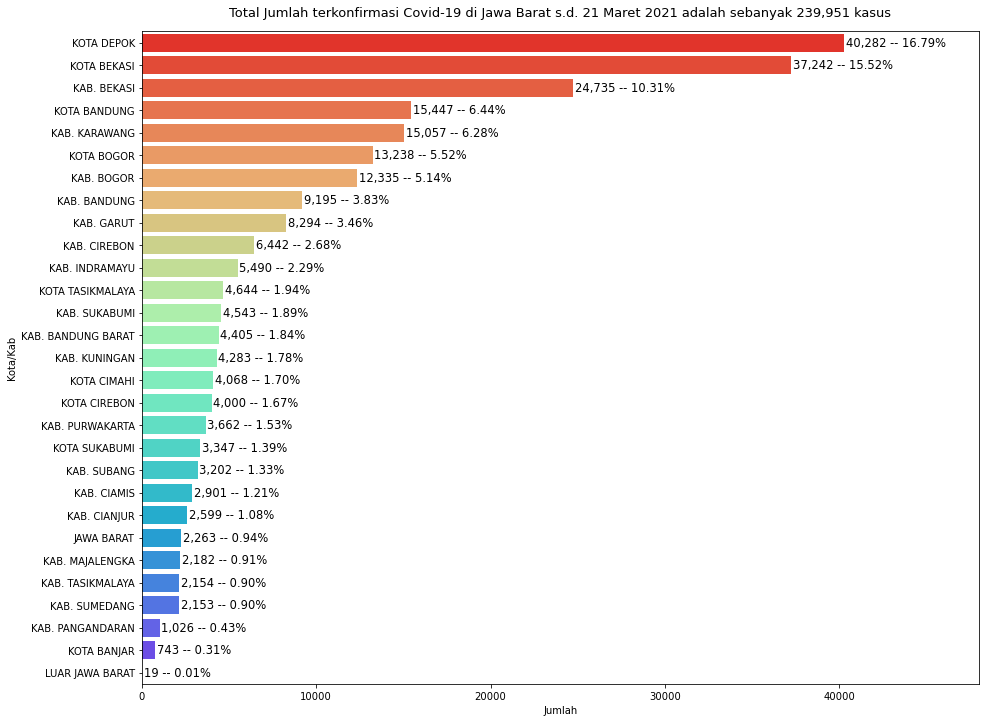

In [25]:
fig, ax1= plt.subplots(1, 1,figsize=(15,12))
#plt.title('Data jumlah kasus per Kota/Kabupaten di Jawa Barat yang terkonfirmasi Covid-19 s.d. 14 Maret 2021', fontsize=16)
ax1= sns.barplot(ax= ax1, y= 'Kota/Kab', x= 'Jumlah', data=df_konfirmasi_kabkota, palette='rainbow_r')
ax1.set_title('Total Jumlah terkonfirmasi Covid-19 di Jawa Barat s.d. 21 Maret 2021 adalah sebanyak {:,.0f} kasus'.format(sum(df_konfirmasi_kabkota['Jumlah'])), pad= 15, fontsize=13)
y = df_konfirmasi_kabkota['Jumlah']
for i, v in enumerate(y):
    ax1.text(v+100, i, '{:,.0f} -- {:,.2f}%'.format(v, 100*v/sum(df_konfirmasi_kabkota['Jumlah'])), fontsize=11.5, va='center')
plt.xlim(0,sum(df_konfirmasi_kabkota['Jumlah'])/5)

In [78]:
#fig.savefig('Data per Kota-Kabupaten yang terkonfirmasi Covid-19 s.d. 21 Maret 2021.jpg', dpi=300)

## TINGKAT KEMATIAN PER KABUPATEN/ KOTA

In [27]:
#df_gender = df.query("""resign_boolean == 'no'""").groupby(["GenderID","RoleID"])["EmpID"].count().reset_index()
df_tingkat_mati= df.query("""status== 'CONFIRMATION' & stage== 'Meninggal'""").groupby(['label_kota'])['id'].count().reset_index()
df_tingkat_mati#[df_tingkat_mati['stage']== 'Meninggal']

,label_kota,id
0,KAB. BANDUNG,43
1,KAB. BANDUNG BARAT,37
2,KAB. BEKASI,60
3,KAB. BOGOR,172
4,KAB. CIAMIS,55
5,KAB. CIANJUR,2
6,KAB. CIREBON,194
7,KAB. GARUT,143
8,KAB. INDRAMAYU,43
9,KAB. KARAWANG,237


In [28]:
data_tingkat_mati= pd.merge(left= df_konfirmasi_kabkota, right= df_tingkat_mati, left_on= 'Kota/Kab', right_on= 'label_kota', how= 'inner')

In [30]:
data_tingkat_mati= data_tingkat_mati.drop(['label_kota'], axis=1).rename(columns={'Jumlah': 'Terkonfirmasi', 'id': 'Meninggal'})

In [31]:
data_tingkat_mati.head()

,Kota/Kab,Terkonfirmasi,Meninggal
0,KOTA DEPOK,40282,322
1,KOTA BEKASI,37242,218
2,KAB. BEKASI,24735,60
3,KOTA BANDUNG,15447,89
4,KAB. KARAWANG,15057,237


In [32]:
data_tingkat_mati['tingkat_meninggal']= data_tingkat_mati.apply(lambda x: x['Meninggal']/x['Terkonfirmasi'], axis=1)

In [33]:
data_tingkat_mati= data_tingkat_mati.sort_values('tingkat_meninggal', ascending= False)
data_tingkat_mati.head()

,Kota/Kab,Terkonfirmasi,Meninggal,tingkat_meninggal
26,KOTA BANJAR,743,24,0.032301
9,KAB. CIREBON,6442,194,0.030115
23,KAB. TASIKMALAYA,2154,60,0.027855
20,KAB. CIAMIS,2901,55,0.018959
24,KAB. SUMEDANG,2153,40,0.018579


(0.0, 0.035)

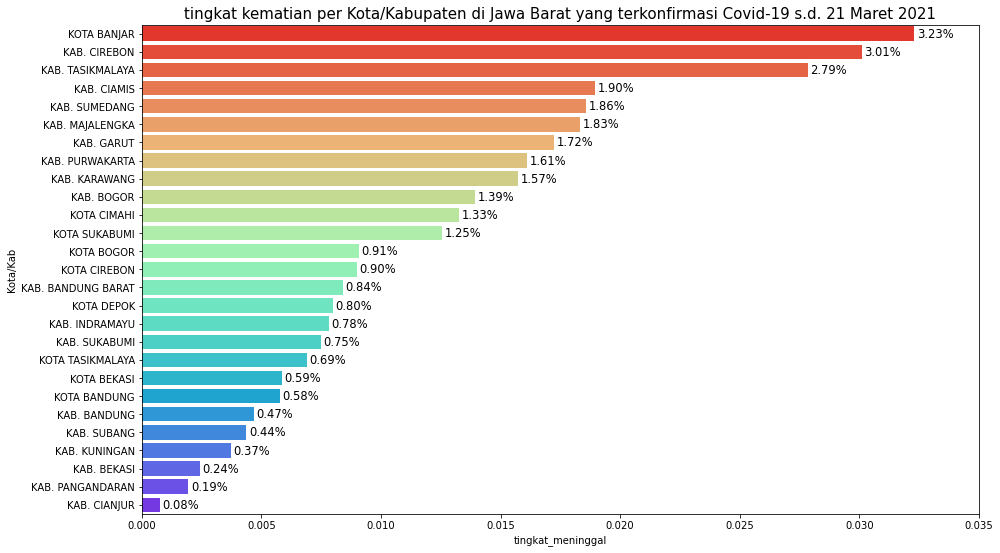

In [34]:
fig, ax1=plt.subplots(1,1, figsize=(15,9))
plt.title('tingkat kematian per Kota/Kabupaten di Jawa Barat yang terkonfirmasi Covid-19 s.d. 21 Maret 2021', fontsize=15)
ax1= sns.barplot(ax= ax1, y= 'Kota/Kab', x= 'tingkat_meninggal', data=data_tingkat_mati, palette='rainbow_r')
#ax1.set_title('Total Jumlah terkonfirmasi Covid-19 di Jawa Barat s.d. 14 Maret 2021 adalah sebanyak {:,.0f} kasus'.format(sum(df_konfirmasi_kabkota['Jumlah'])), pad= 15, fontsize=13)
y = data_tingkat_mati['tingkat_meninggal']
for i, v in enumerate(y):
    ax1.text(v+0.0001, i, '{:,.2f}%'.format(v*100), fontsize=11.5, va='center')
plt.xlim(0,0.035)

In [61]:
#fig.savefig('tingkat kematian per Kota-Kabupaten di Jawa Barat yang terkonfirmasi Covid-19 s.d. 21 Maret 2021.jpg', dpi= 300)

### akan melihat distribusi usia yang terkonfirmasi Covid-19

In [52]:
#Usia yang terkonfirmasi Covid-19
usia_konfirmasi= df_konfirmasi[df_konfirmasi['umur']!= 0]
usia_konfirmasi.umur= usia_konfirmasi.umur.astype(float)

#Usia yang terkonfirmasi Covid-19 dan meninggal
usia_meninggal= df.query("""status== 'CONFIRMATION' & stage== 'Meninggal'""")
usia_meninggal= usia_meninggal[usia_meninggal['umur']!=0]

C:\Anaconda\envs\geopandas_env\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


C:\Anaconda\envs\geopandas_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\geopandas_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


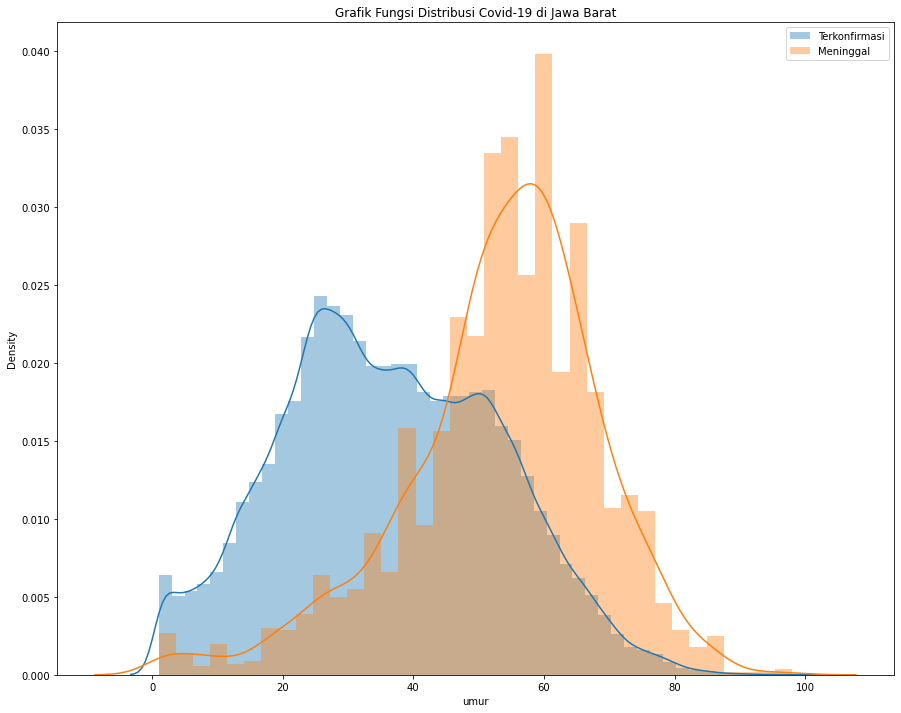

In [54]:
fig, ax1= plt.subplots(1,1, figsize=(15,12))
plt.title('Grafik Fungsi Distribusi Covid-19 di Jawa Barat')

ax1= sns.distplot(usia_konfirmasi['umur'],hist = True, label= 'Terkonfirmasi')
#ax1.set_title('Grafik fungsi Distribusi yang terkonfirmasi Covid-19 berdasarkan Usia', fontsize=10)

ax2= sns.distplot(usia_meninggal['umur'],hist = True, label= 'Meninggal')
#ax2.set_title('Grafik fungsi Distribusi yang terkonfirmasi dan meninggal Covid-19 berdasarkan Usia', fontsize=10)

plt.legend()

In [73]:
fig.savefig('Grafik Fungsi Distribusi Covid-19 di Jawa Barat.jpg', dpi= 300)

### Menghitung Odds Rasio perbandingan laki-laki dengan perempuan yang terkonfirmasi dan meninggal

In [29]:
df_konfirmasi_stage_gender= df_konfirmasi.groupby(['gender', 'stage'])['id'].count()#.reset_index()
#df_konfirmasi_stage_gender= df_konfirmasi_stage.rename(columns={'id': 'Jumlah'}).sort_values('Jumlah', ascending= False)
df_konfirmasi_stage_gender

gender     stage    
Laki-laki  Diisolasi     16599
           Meninggal      1219
           Selesai       95823
Perempuan  Diisolasi     17608
           Meninggal       948
           Selesai      100573
Name: id, dtype: int64

In [33]:
(1219*100573)/(948*95823)

1.3496060290661611

Pada orang yang terkonfirmasi positif Covid-19, Laki-laki beresiko 1.34 lebih tinggi untuk meninggal dibandingkan dengan perempuan

### Menghitung Signifikansi perbedaan proporsi yang terkonfirmasi Covid-19 dan meninggal antara laki-laki dan perempuan

In [70]:
meninggal_laki= 1219
meninggal_perempuan= 948
selesai_laki= 95823
selesai_perempuan= 100573
total_laki= meninggal_laki + selesai_laki
total_perempuan= meninggal_perempuan + selesai_perempuan
p_laki= meninggal_laki/total_laki
p_perempuan= meninggal_perempuan/total_perempuan
p_total= (meninggal_laki+meninggal_perempuan)/(total_laki+total_perempuan)

In [74]:
(p_laki-p_perempuan)/(((p_total*(1-p_total))*((1/total_laki)+(1/total_perempuan)))**0.5)

6.9111861347952654

Dengan nilai Zhitung 6,91 dan Ztabelnya 2.56 (alpha 0.01 satu arah), dapat disimpulkan bahwa proporsi tingkat kematian antara laki-laki lebih besar dibandingkan dengan proporsi tingkat kematian pada perempuan

### Membuat Plot GIS jumlah terkonfirmasi di Jawa Barat

In [24]:
# Digunakan ketika data batas wilayah Jawa Barat belum dimiliki, apabila dimiliki maka skip langsung ke proses pemanggilan menggunakan Geopandas
#ya = gpd.read_file('https://data.jabarprov.go.id/dataset/49beae49-4cf8-4090-aaba-9c6ed38326f9/resource/fff4a9bf-11a8-4b79-b416-f11a0ef16e5a/download/kota.geojson')
#ya.to_file('Jabar.geojson')

In [55]:
peta_jabar = gpd.read_file('Jabar.geojson')

In [56]:
peta_jabar['kemendag_1'].unique()

array(['KAB. SUKABUMI', 'KAB. CIANJUR', 'KAB. GARUT', 'KAB. TASIKMALAYA',
       'KAB. KUNINGAN', 'KAB. CIREBON', 'KAB. MAJALENGKA',
       'KAB. SUMEDANG', 'KAB. SUBANG', 'KAB. PURWAKARTA', 'KAB. KARAWANG',
       'KAB. BANDUNG BARAT', 'KOTA BOGOR', 'KAB. PANGANDARAN',
       'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK',
       'KOTA TASIKMALAYA', 'KOTA BANJAR', 'KAB. BOGOR', 'KAB. BANDUNG',
       'KAB. CIAMIS', 'KAB. INDRAMAYU', 'KAB. BEKASI', 'KOTA SUKABUMI',
       'KOTA CIMAHI'], dtype=object)

In [57]:
peta_jabar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          27 non-null     int64   
 1   id_provins  27 non-null     int64   
 2   kemendagri  27 non-null     object  
 3   kemendag_1  27 non-null     object  
 4   bps_kode    27 non-null     object  
 5   bps_nama    27 non-null     object  
 6   geometry    27 non-null     geometry
dtypes: geometry(1), int64(2), object(4)
memory usage: 1.6+ KB


In [58]:
data_jabar = peta_jabar.merge(df_konfirmasi_kabkota, how='inner', left_on="kemendag_1", right_on="Kota/Kab")
data_jabar

,id,id_provins,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,Kota/Kab,Jumlah
0,177,13,32.02,KAB. SUKABUMI,3202,SUKABUMI,"POLYGON ((106.74152 -6.71556, 106.74234 -6.716...",KAB. SUKABUMI,4543
1,185,13,32.03,KAB. CIANJUR,3203,CIANJUR,"POLYGON ((107.23021 -6.60494, 107.23037 -6.604...",KAB. CIANJUR,2599
2,179,13,32.05,KAB. GARUT,3205,GARUT,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947...",KAB. GARUT,8294
3,173,13,32.06,KAB. TASIKMALAYA,3206,TASIKMALAYA,"MULTIPOLYGON (((108.35489 -7.35286, 108.35487 ...",KAB. TASIKMALAYA,2154
4,176,13,32.08,KAB. KUNINGAN,3208,KUNINGAN,"POLYGON ((108.42106 -6.78413, 108.42189 -6.784...",KAB. KUNINGAN,4283
5,174,13,32.09,KAB. CIREBON,3209,CIREBON,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ...",KAB. CIREBON,6442
6,186,13,32.10,KAB. MAJALENGKA,3210,MAJALENGKA,"POLYGON ((108.12245 -6.54255, 108.12238 -6.542...",KAB. MAJALENGKA,2182
7,187,13,32.11,KAB. SUMEDANG,3211,SUMEDANG,"POLYGON ((107.85702 -6.57956, 107.85758 -6.579...",KAB. SUMEDANG,2153
8,167,13,32.13,KAB. SUBANG,3213,SUBANG,"MULTIPOLYGON (((107.89792 -6.41911, 107.89787 ...",KAB. SUBANG,3202
9,162,13,32.14,KAB. PURWAKARTA,3214,PURWAKARTA,"POLYGON ((107.50642 -6.41127, 107.50693 -6.411...",KAB. PURWAKARTA,3662


<AxesSubplot:title={'center':'Total Kasus terkonfirmasi Covid-19 di Jawa Barat s.d. 21 Maret 2021 sebanyak 239,951 kasus'}>

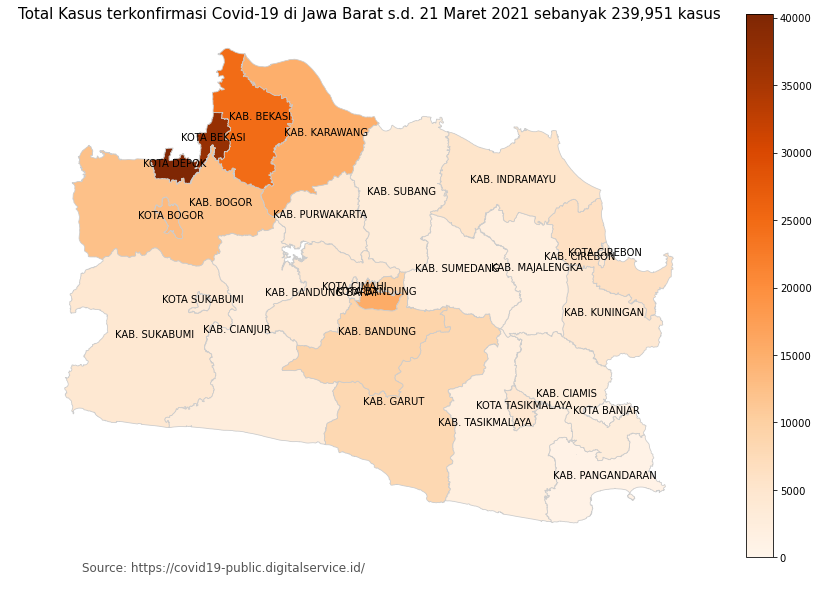

In [59]:
# set a variable that will call whatever column we want to visualise on the map
values = 'Jumlah'

# set the value range for the choropleth
vmin, vmax = 0,max(data_jabar['Jumlah'])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# remove the axis
ax.axis('off')

# add a title
title = 'Total Kasus terkonfirmasi Covid-19 di Jawa Barat s.d. 21 Maret 2021 sebanyak {:,} kasus'.format(df[df['status'] == 'CONFIRMATION']['id'].count())
ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: https://covid19-public.digitalservice.id/',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Add Labels Province Name
data_jabar['coords'] = data_jabar['geometry'].apply(lambda x: x.representative_point().coords[:])
data_jabar['coords'] = [coords[0] for coords in data_jabar['coords']]
for idx, row in data_jabar.iterrows():
    plt.annotate(row['kemendag_1'], row['coords'], ha='center', fontsize=10)

# Add Value Labels
#data_jabar['coords'] = data_jabar['geometry'].apply(lambda x: x.representative_point().coords[:])
#data_jabar['coords'] = [coords[0] for coords in data_jabar['coords']]
#for idx, row in data_jabar.iterrows():
#    plt.annotate(text=row[values], xy=row['coords'],horizontalalignment='center')

# create map
data_jabar.plot(column=values, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))

In [63]:
fig.savefig('Geografis Total Kasus terkonfirmasi Covid-19 di Jawa Barat s.d. 21 Maret 2021.jpg', dpi= 300)

### Membuat Plot GIS rasio terkonfirmasi Covid-19 per 100,000 penduduk tiap wilayah di Jawa Barat

In [53]:
data_penduduk= pd.read_csv('Data Penduduk Jabar.csv')
data_penduduk.head()

,wilayah,penduduk
0,KAB. BOGOR,6088233
1,KAB. SUKABUMI,2470219
2,KAB. CIANJUR,2264328
3,KAB. BANDUNG,3831505
4,KAB. GARUT,2636637


In [54]:
data_rasio_terkonfirmasi= data_jabar.merge(data_penduduk, left_on='kemendag_1', right_on= 'wilayah', how='inner')
data_rasio_terkonfirmasi= data_rasio_terkonfirmasi.drop(['Kota/Kab', 'wilayah'], axis=1)
data_rasio_terkonfirmasi= (data_rasio_terkonfirmasi.rename(columns={'Jumlah': 'Jumlah_terkonfirmasi'}))
data_rasio_terkonfirmasi.head()

,id,id_provins,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,Jumlah_terkonfirmasi,coords,penduduk
0,177,13,32.02,KAB. SUKABUMI,3202,SUKABUMI,"POLYGON ((106.74152 -6.71556, 106.74234 -6.716...",4543,"(106.73449658207929, -7.07648985392306)",2470219
1,185,13,32.03,KAB. CIANJUR,3203,CIANJUR,"POLYGON ((107.23021 -6.60494, 107.23037 -6.604...",2599,"(107.06919894860063, -7.053849588071261)",2264328
2,179,13,32.05,KAB. GARUT,3205,GARUT,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947...",8294,"(107.70305031149638, -7.342897160015735)",2636637
3,173,13,32.06,KAB. TASIKMALAYA,3206,TASIKMALAYA,"MULTIPOLYGON (((108.35489 -7.35286, 108.35487 ...",2154,"(108.06914939881287, -7.427996911912414)",1755710
4,176,13,32.08,KAB. KUNINGAN,3208,KUNINGAN,"POLYGON ((108.42106 -6.78413, 108.42189 -6.784...",4283,"(108.5538030243525, -6.987556362745465)",1087105


In [55]:
data_rasio_terkonfirmasi['rasio_konfirmasi']= data_rasio_terkonfirmasi.apply(lambda x: 100000*x['Jumlah_terkonfirmasi']/x['penduduk'], axis=1)
data_rasio_terkonfirmasi.head()

,id,id_provins,kemendagri,kemendag_1,bps_kode,bps_nama,geometry,Jumlah_terkonfirmasi,coords,penduduk,rasio_konfirmasi
0,177,13,32.02,KAB. SUKABUMI,3202,SUKABUMI,"POLYGON ((106.74152 -6.71556, 106.74234 -6.716...",4543,"(106.73449658207929, -7.07648985392306)",2470219,183.910819
1,185,13,32.03,KAB. CIANJUR,3203,CIANJUR,"POLYGON ((107.23021 -6.60494, 107.23037 -6.604...",2599,"(107.06919894860063, -7.053849588071261)",2264328,114.780191
2,179,13,32.05,KAB. GARUT,3205,GARUT,"POLYGON ((107.91816 -6.94760, 107.91840 -6.947...",8294,"(107.70305031149638, -7.342897160015735)",2636637,314.567383
3,173,13,32.06,KAB. TASIKMALAYA,3206,TASIKMALAYA,"MULTIPOLYGON (((108.35489 -7.35286, 108.35487 ...",2154,"(108.06914939881287, -7.427996911912414)",1755710,122.685409
4,176,13,32.08,KAB. KUNINGAN,3208,KUNINGAN,"POLYGON ((108.42106 -6.78413, 108.42189 -6.784...",4283,"(108.5538030243525, -6.987556362745465)",1087105,393.982182


<AxesSubplot:title={'center':'Rasio terkonfirmasi Covid-19 per 100,000 orang penduduk tiap Wilayah di Jawa Barat s.d. 21 Maret 2021'}>

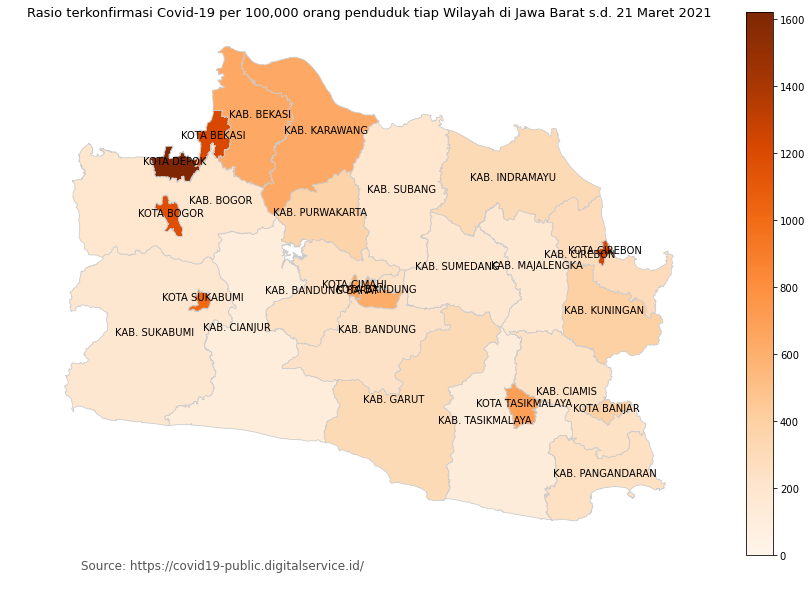

In [64]:
# set a variable that will call whatever column we want to visualise on the map
values = 'rasio_konfirmasi'

# set the value range for the choropleth
vmin, vmax = 0,max(data_rasio_terkonfirmasi['rasio_konfirmasi'])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# remove the axis
ax.axis('off')

# add a title
title = ('Rasio terkonfirmasi Covid-19 per 100,000 orang penduduk tiap Wilayah di Jawa Barat s.d. 21 Maret 2021')
ax.set_title(title, fontdict={'fontsize': '13', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: https://covid19-public.digitalservice.id/',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12 ,color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Add Labels Province Name
data_rasio_terkonfirmasi['coords'] = data_rasio_terkonfirmasi['geometry'].apply(lambda x: x.representative_point().coords[:])
data_rasio_terkonfirmasi['coords'] = [coords[0] for coords in data_rasio_terkonfirmasi['coords']]
for idx, row in data_rasio_terkonfirmasi.iterrows():
    plt.annotate(row['kemendag_1'], row['coords'], ha='center', fontsize=10)

# Add Value Labels
#data_rasio_terkonfirmasi['coords'] = data_rasio_terkonfirmasi['geometry'].apply(lambda x: x.representative_point().coords[:])
#data_rasio_terkonfirmasi['coords'] = [coords[0] for coords in data_rasio_terkonfirmasi['coords']]
#for idx, row in data_rasio_terkonfirmasi.iterrows():
#    plt.annotate(text=row[values], xy=row['coords'],horizontalalignment='center')

# create map
data_rasio_terkonfirmasi.plot(column=values, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8',norm=plt.Normalize(vmin=vmin, vmax=vmax))

In [65]:
fig.savefig('Geografis Jumlah terkonfirmasi per 100ribu penduduk Covid-19 di Jawa Barat s.d. 21 Maret 2021.jpg', dpi= 300)

### FUNGSI DISTRIBUSI YANG TERKONFIRMASI LAKI-LAKI DAN PEREMPUAN

In [60]:
df_konfirmasi_perempuan= df_konfirmasi[df_konfirmasi['gender']== 'Perempuan']
df_konfirmasi_laki= df_konfirmasi[df_konfirmasi['gender']== 'Laki-laki']

In [64]:
df_konfirmasi_perempuan['umur']=df_konfirmasi_perempuan['umur'].astype(int)
df_konfirmasi_laki['umur']=df_konfirmasi_laki['umur'].astype(int)

df_konfirmasi_perempuan_umur= df_konfirmasi_perempuan[df_konfirmasi_perempuan['umur']!=0]
df_konfirmasi_laki_umur= df_konfirmasi_laki[df_konfirmasi_laki['umur']!=0]

<ipython-input-64-43cf9d69b273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konfirmasi_perempuan['umur']=df_konfirmasi_perempuan['umur'].astype(int)
<ipython-input-64-43cf9d69b273>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_konfirmasi_laki['umur']=df_konfirmasi_laki['umur'].astype(int)


In [65]:
df_konfirmasi_perempuan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119129 entries, 230342 to 470291
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       119129 non-null  object 
 1   kode_kab                 119129 non-null  int64  
 2   nama_kab                 119129 non-null  object 
 3   kode_kec                 97438 non-null   float64
 4   nama_kec                 99375 non-null   object 
 5   kode_kel                 119129 non-null  float64
 6   nama_kel                 99307 non-null   object 
 7   status                   119129 non-null  object 
 8   stage                    119129 non-null  object 
 9   umur                     119129 non-null  int32  
 10  gender                   119129 non-null  object 
 11  longitude                118671 non-null  float64
 12  latitude                 118671 non-null  float64
 13  tanggal_update_nasional  119129 non-null  object 
 14 

C:\Anaconda\envs\geopandas_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\envs\geopandas_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


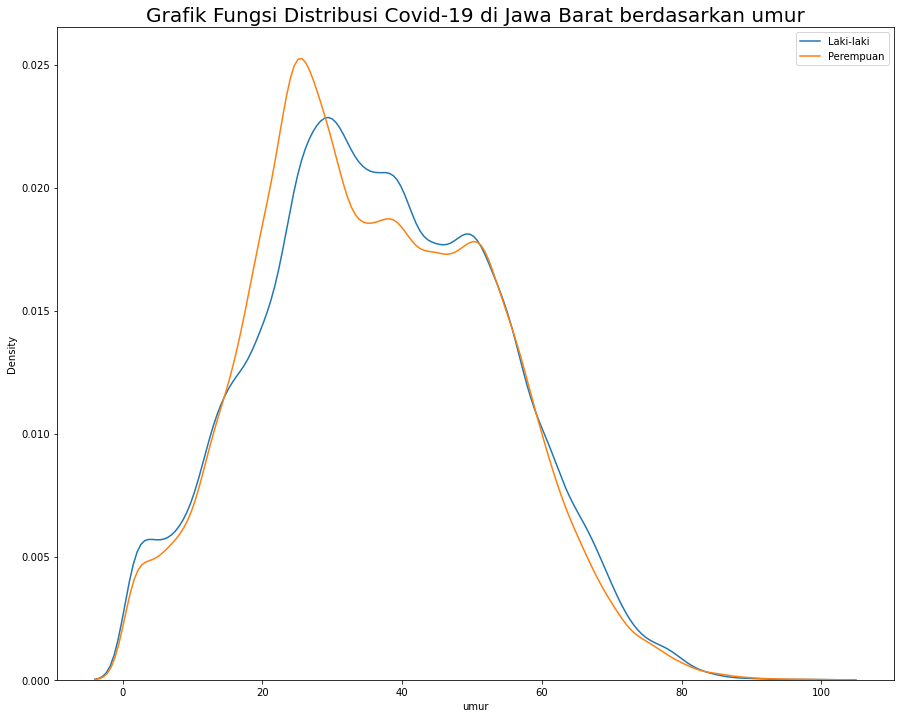

In [71]:
fig, ax1= plt.subplots(1,1, figsize=(15,12))
plt.title('Grafik Fungsi Distribusi Covid-19 di Jawa Barat berdasarkan umur', fontsize= 20)

ax1= sns.distplot(df_konfirmasi_laki_umur['umur'],hist = False, label= 'Laki-laki')

ax2= sns.distplot(df_konfirmasi_perempuan_umur['umur'],hist = False, label='Perempuan')

plt.legend()